# Homework 

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using Gauss-Siedel method. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 



Initializing
0
3.141592653589793
0.7853981633974483
0.44178646691106493
0.3067961575771283
0.2348908081449892
0.19026155459744132
0.15987255629368313
0.1378492959879205
0.12115660780188353
0.10806870263809998
10
0.09753200413088514
0.08886697070603411
0.08161567274911796
0.07545827731982069
0.07016464817110846
0.06556496567989178
0.061531183611695184
0.057964929890256034
0.05478938203361361
0.05194367313297654
20
0.049378954272035536
0.04705556810163891
0.044940984204510315
0.043008267019911006
0.04123492267664197
0.039602019738647076
0.038093510850673695
0.0366957036966884
0.035396844286506024
0.034186785697639
30
0.03305672250374503
0.03199897618013381
0.031006820424548387
0.030074337992130218
0.02919630260524908
0.028368080959916497
0.027585550948868942
0.026845033054514467
0.02614323250201611
0.025477190253854864
40
0.024844241308485948
0.02424197906379799
0.023668224740717836
0.023121001048091117
0.022598509418001456
0.02209911025925848
0.02162130577232002
0.021163724946219986
0.0

0.0026024424950268354
0.0025956863026994625
0.0025889650657902052
0.0025822785128717385
0.0025756263753056174
0.0025690083872014213
390
0.002562424285384779
0.002555873809364506
0.0025493567012908613
0.0025428727059289002
0.0025364215706273896
0.0025300030452752864
0.002523616882277757
0.0025172628365250915
0.0025109406653625044
0.0025046501285448386
400
0.0024983909882285715
0.0024921630089247415
0.00248596595747852
0.002479799603036348
0.002473663717019292
0.0024675580730919577
0.002461482447140284
0.0024554366172395703
0.002449420363626942
0.002443433468679146
410
0.00243747571688413
0.0024315468948170604
0.002425646791107461
0.0024197751964258885
0.0024139319034528484
0.0024081167068530362
0.0024023294032549103
0.002396569791224934
0.002390837671247148
0.002385132845697413
420
0.0023794551188220936
0.002373804296713189
0.0023681801872950103
0.0023625826002904304
0.0023570113472084486
0.0023514662413175458
0.0023459470976332497
0.002340453732887937
0.002334985965513958
0.00232954361

0.001289421775913624
0.001287676480582256
0.0012859352903449306
0.0012841981882871778
0.0012824651575815693
0.0012807361814886065
0.0012790112433638257
0.0012772903266498048
0.001275573414879716
0.0012738604916737728
780
0.001272151540742783
0.0012704465458810432
0.0012687454909752205
0.0012670483599936944
0.0012653551369918858
0.0012636658061122574
0.0012619803515825367
0.0012602987577121638
0.0012586210088940675
0.0012569470896064416
790
0.001255276984410969
0.0012536106779510447
0.0012519481549491118
0.0012502894002093257
0.0012486343986202186
0.0012469831351484828
0.00124533559483897
0.0012436917628182442
0.0012420516242910296
0.001240415164537545
800
0.0012387823689179456
0.001237153222874099
0.0012355277119162622
0.0012339058216337406
0.0012322875377019926
0.0012306728458506555
0.0012290617319052899
0.0012274541817562934
0.0012258501813668943
0.0012242497167775923
810
0.0012226527741008297
0.0012210593395218794
0.0012194693992970684
0.0012178829397591073
0.0012162999473037672
0.0

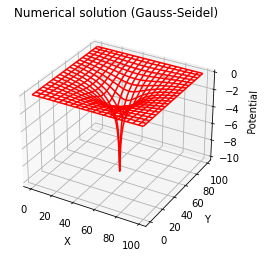

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
print("Initializing")
Nmax = 100
Niter = 5000
V = np.zeros((Nmax, Nmax), float)
rho = np.zeros((Nmax, Nmax), float)
rho[50,50] = 1
G = 1

for iter in range(Niter):
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):
        for j in range(1,Nmax-1): 
            du = 1./4.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-4*np.pi*G*rho[i,j])-V[i,j]
            if(maxerr<abs(du)): # how much correction we have in this step
                maxerr=abs(du)
            V[i,j] = V[i,j]+du
    print(maxerr)
    if(maxerr<1.e-3):
        break

x = range(0, Nmax, 1)
y = range(0, Nmax, 1)
X, Y = np.meshgrid(x,y)

def functz(V):  # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V)                          
fig = plt.figure()  # Create figure
ax = fig.add_subplot(projection='3d')  # Plot axes
ax.plot_wireframe(X, Y, Z, color='r',rstride=5,cstride=5)  # Red wireframe
ax.set_title('Numerical solution (Gauss-Seidel)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
plt.show()

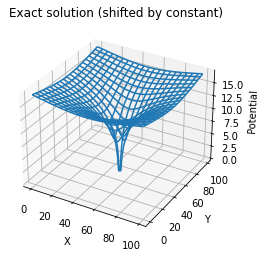

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = range(0, Nmax, 1)
ys = range(0, Nmax, 1)                              
X, Y = np.meshgrid(xs,ys)
R = (X-50)**2+(Y-50)**2  # compute the radial component from X and Y
Z = np.zeros((Nmax,Nmax))

# compute potential (non-positive R returns nan value)
for i in range(len(R)):
    for j in range(len(R[i])):
        if R[i,j] <= 0:
            Z[i,j] = np.nan
        else:
            Z[i,j] = 2*np.log(R[i,j])

# Plot the surface.
ax.plot_wireframe(X, Y, Z, rstride=5,cstride=5)
ax.set_title('Exact solution (shifted by constant)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')

plt.show()